In [2]:
# Step 3 - Climate Analysis and Exploration
#
# You are now ready to use Python and SQLAlchemy to do basic climate analysis
# and data exploration on your new weather station tables. All of the following
# analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.
# - Create a Jupyter Notebook file called climate_analysis.ipynb and use it to complete
#    your climate analysis and data exporation.
#
# Dependencies
import pandas as pd
import numpy as np
import os
import datetime as dt
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline

# And the SQL Alchemy stuff
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func


In [3]:
# Use SQLAlchemy create_engine to connect to your sqlite database.
# Create an engine for the hawaii.sqlite database (created in part 2)
#
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)


In [4]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [5]:
# Use Inspector to print the column names and types for measurement
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp TEXT
tobs INTEGER


In [6]:
# Use Inspector to print the column names and types for station
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude TEXT
longitude TEXT
elevation FLOAT


In [7]:
# Use SQLAlchemy automap_base() to reflect your tables into classes
# 
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()


['measurement', 'station']

In [8]:
#  and save a reference to those classes called Station and Measurement.
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create a database session object
session = Session(engine)

In [10]:
# Precipitation Analysis
# - Design a query to retrieve the last 12 months of precipitation data.
for stat in session.query(Measurement.station).distinct():
     print(stat)

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


In [11]:
# Total dates
session.query(func.count(Measurement.date)).all()

[(18103)]

In [12]:
# Latest Date
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("Max Date is ", max_date)

Max Date is  ('2017-08-23',)


In [13]:
#yearago_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first() - dt.timedelta(days=7)
yearago_date = dt.date(2016, 8 , 22)
print(yearago_date)

2016-08-22


In [14]:
# Precipitation Analysis
# - Design a query to retrieve the last 12 months of precipitation data.
# - Select only the date and prcp values.

# select(station, date, prcp) frome measurement
# where date >= yearago_date
prcp_in_last_year = session.query(Measurement.date, func.sum(Measurement.prcp)).\
filter(Measurement.date > yearago_date).group_by(Measurement.date).\
all()
prcp_in_last_year
    

[('2016-08-23', 2.71),
 ('2016-08-24', 9.329999999999998),
 ('2016-08-25', 0.54),
 ('2016-08-26', 0.09999999999999999),
 ('2016-08-27', 0.31999999999999995),
 ('2016-08-28', 3.0999999999999996),
 ('2016-08-29', 1.46),
 ('2016-08-30', 0.07),
 ('2016-08-31', 3.1799999999999997),
 ('2016-09-01', 0.03),
 ('2016-09-02', 0.25),
 ('2016-09-03', 1.27),
 ('2016-09-04', 1.3800000000000001),
 ('2016-09-05', 0.33999999999999997),
 ('2016-09-06', 1.23),
 ('2016-09-07', 2.0),
 ('2016-09-08', 0.4600000000000001),
 ('2016-09-09', 1.0699999999999998),
 ('2016-09-10', 1.4),
 ('2016-09-11', 1.25),
 ('2016-09-12', 1.54),
 ('2016-09-13', 2.71),
 ('2016-09-14', 14.280000000000001),
 ('2016-09-15', 4.96),
 ('2016-09-16', 0.8200000000000001),
 ('2016-09-17', 0.6799999999999999),
 ('2016-09-18', 0.53),
 ('2016-09-19', 0.32),
 ('2016-09-20', 1.03),
 ('2016-09-21', 1.17),
 ('2016-09-22', 1.44),
 ('2016-09-23', 1.57),
 ('2016-09-24', 0.28),
 ('2016-09-25', 0.09),
 ('2016-09-26', 1.67),
 ('2016-09-27', 1.359999999

In [15]:
# Load the query results into a Pandas DataFrame.
prcp_df = pd.DataFrame(prcp_in_last_year, columns=['date', 'prcp'])

prcp_df.head(11)

,date,prcp
0,2016-08-23,2.71
1,2016-08-24,9.33
2,2016-08-25,0.54
3,2016-08-26,0.10
4,2016-08-27,0.32
5,2016-08-28,3.10
6,2016-08-29,1.46
7,2016-08-30,0.07
8,2016-08-31,3.18
9,2016-09-01,0.03


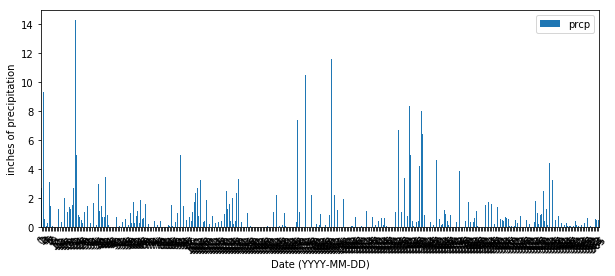

In [16]:
# - Plot the results using the DataFrame plot method.
ax = prcp_df.plot(kind='bar', figsize = (10,4), sort_columns=True, use_index=True, legend=True, rot = 45)
plt.xlabel('Date (YYYY-MM-DD)')
plt.ylabel('inches of precipitation')

plt.show()

In [17]:
# Station Analysis
# - Design a query to calculate the total number of stations.
station_count = session.query(func.count(Station.id)).all()
print(station_count)

[(9,)]


In [18]:
# - Design a query to find the most active stations.
#   - List the stations and observation counts in descending order

station_act = session.query(Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).\
group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
station_act

[('WAIHEE 837.5, HI US', 2772),
 ('KANEOHE 838.1, HI US', 2696),
 ('WAIKIKI 717.2, HI US', 2685),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 2572),
 ('MANOA LYON ARBO 785.2, HI US', 2484),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 1937),
 ('HONOLULU OBSERVATORY 702.2, HI US', 1932),
 ('PEARL CITY, HI US', 683),
 ('UPPER WAHIAWA 874.3, HI US', 342)]

In [19]:
#   - Which station has the highest number of observations?
station_act = session.query(Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).\
group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
station_act


('WAIHEE 837.5, HI US', 2772)

In [20]:
# - Design a query to retrieve the last 12 months of temperature observation data (tobs).
#   - Filter by the station with the highest number of observations.
Station_id = session.query(Station.station).filter(Station.name == 'WAIHEE 837.5, HI US').all()
Station_id

[('USC00519281')]

In [21]:
Waihee_in_last_year = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').filter(Measurement.date > yearago_date).\
all()
Waihee_in_last_year
    

[(77),
 (77),
 (80),
 (80),
 (75),
 (73),
 (78),
 (77),
 (78),
 (80),
 (80),
 (78),
 (78),
 (78),
 (73),
 (74),
 (80),
 (79),
 (77),
 (80),
 (76),
 (79),
 (75),
 (79),
 (78),
 (79),
 (78),
 (78),
 (76),
 (74),
 (77),
 (78),
 (79),
 (79),
 (77),
 (80),
 (78),
 (78),
 (78),
 (77),
 (79),
 (79),
 (79),
 (79),
 (75),
 (76),
 (73),
 (72),
 (71),
 (77),
 (79),
 (78),
 (79),
 (77),
 (79),
 (77),
 (78),
 (78),
 (78),
 (78),
 (77),
 (74),
 (75),
 (76),
 (73),
 (76),
 (74),
 (77),
 (76),
 (76),
 (74),
 (75),
 (75),
 (75),
 (75),
 (71),
 (63),
 (70),
 (68),
 (67),
 (77),
 (74),
 (77),
 (76),
 (76),
 (75),
 (76),
 (75),
 (73),
 (75),
 (73),
 (75),
 (74),
 (75),
 (74),
 (75),
 (73),
 (75),
 (73),
 (73),
 (74),
 (70),
 (72),
 (70),
 (67),
 (67),
 (69),
 (70),
 (68),
 (69),
 (69),
 (66),
 (65),
 (68),
 (62),
 (75),
 (70),
 (69),
 (76),
 (76),
 (74),
 (73),
 (71),
 (74),
 (74),
 (72),
 (71),
 (72),
 (74),
 (69),
 (67),
 (72),
 (70),
 (64),
 (63),
 (63),
 (62),
 (70),
 (70),
 (62),
 (62),
 (63),
 (65),

In [22]:
# Load the query results into a Pandas DataFrame
tobs_df = pd.DataFrame(Waihee_in_last_year, columns=['Temperature'])

tobs_df.head(11)

,Temperature
0,77
1,77
2,80
3,80
4,75
5,73
6,78
7,77
8,78
9,80


Text(0,0.5,'Frequency')

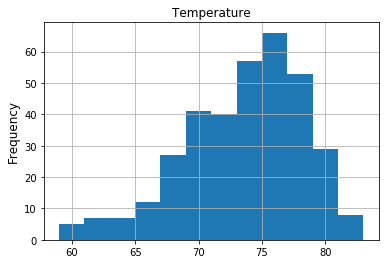

In [23]:
# Plot the results as a histogram with bins=12.
tobs_df.hist(column='Temperature', bins=12)
plt.ylabel("Frequency",fontsize=12)


In [34]:
# Temperature Analysis
#
# Write a function called calc_temps that will accept a start date and end date in the 
#  format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
# Use the calc_temps function to calculate the min, avg, and max temperatures for your 
#  trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

In [67]:
def calc_temps(sy, sm, sd, ey, em, ed):
    # Convert dates to "year - 1" dates
    start_date_ly = dt.date(sy, sm, sd) - dt.timedelta(days=365)
    end_date_ly = dt.date(ey, em, ed) - dt.timedelta(days=365)

    temp_info = session.query(Measurement.tobs).filter(Measurement.date >= start_date_ly, Measurement.date <= end_date_ly).all()
    temperatures = [temperature[0] for temperature in temp_info]
    # Get the minimum temp
    temp_min = min(temperatures)
    # Get the maximum temp
    temp_max = max(temperatures)
    # Get the average temp
    temp_avg = np.mean(temperatures)
    print('Start date (last year): ', start_date_ly)
    print('End date (last year): ', end_date_ly)
    print('Min temp: ', temp_min)
    print('Avg temp: ', temp_avg)
    print('Max temp: ', temp_max)
    # Plot the min, avg, and max temperature from your previous query as a bar chart.
    # Use the average temperature as the bar height.
    # Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).
    plt.figure(figsize = (2,6))
    plt.bar(1,temp_avg, yerr=(temp_max - temp_min))
    plt.title = ('Temperature Analysis')
    plt.ylabel('Temperature')
    plt.show()   
    

Start date (last year):  2016-07-01
End date (last year):  2016-07-11
Min temp:  71
Avg temp:  76.6315789474
Max temp:  81


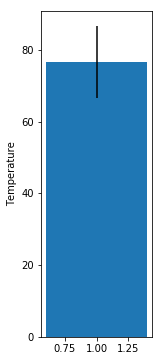

In [68]:
start_year = 2017
start_mo = 7
start_day = 1
end_year = 2017
end_mo = 7
end_day = 11

calc_temps(start_year, start_mo, start_day, end_year, end_mo, end_day)